# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate
import os
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/chiraggarg95/Assignment-Datasets/main/SeoulBikeData.csv', encoding = "ISO-8859-1")
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Analysing Dataset

In [3]:
df.shape

(8760, 14)

In [4]:
df.drop_duplicates().shape

(8760, 14)

In [5]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [6]:
for columns in df.columns:
  print(f"{columns}: {len(pd.unique(df[columns]))}")

Date: 365
Rented Bike Count: 2166
Hour: 24
Temperature(°C): 546
Humidity(%): 90
Wind speed (m/s): 65
Visibility (10m): 1789
Dew point temperature(°C): 556
Solar Radiation (MJ/m2): 345
Rainfall(mm): 61
Snowfall (cm): 51
Seasons: 4
Holiday: 2
Functioning Day: 2


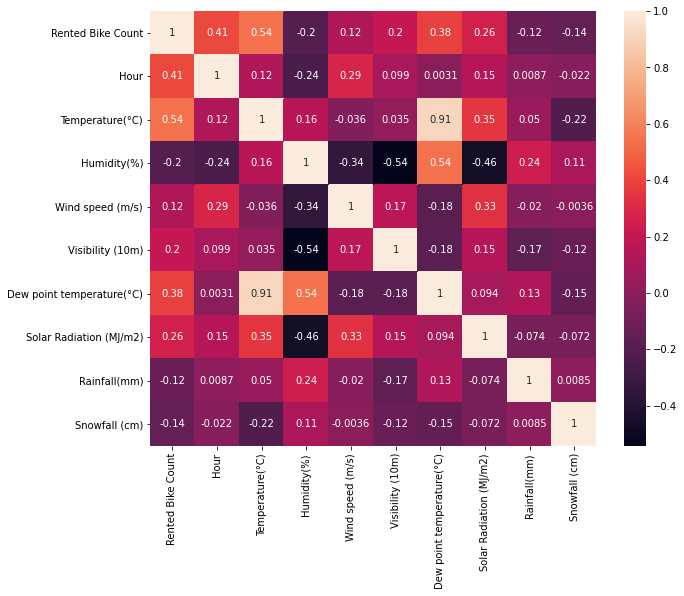

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

# Details of prediction

Variable to be predicted: Rented Bike Count :: Continuous variable

Supervised Learning Problem

Root Mean Square Error (RMSE) will be used as a measure of performance

All variables except Date and Dew Temperature (due to irrelevance and high correlation) will be relevant for prediction. 

# Normalising and One Hot Encoding

In [8]:
list(df.columns)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [9]:
scaler = StandardScaler()

df.loc[:, ['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',]] = scaler.fit_transform(df.loc[:, ['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',]])
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-17.6,-0.655132,-0.1318,-0.171891,Winter,No Holiday,Yes
1,01/12/2017,204,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-17.6,-0.655132,-0.1318,-0.171891,Winter,No Holiday,Yes
2,01/12/2017,173,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-17.7,-0.655132,-0.1318,-0.171891,Winter,No Holiday,Yes
3,01/12/2017,107,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-17.6,-0.655132,-0.1318,-0.171891,Winter,No Holiday,Yes
4,01/12/2017,78,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-18.6,-0.655132,-0.1318,-0.171891,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,1.083473,-0.726961,-1.189822,0.844486,0.751605,-10.3,-0.655132,-0.1318,-0.171891,Autumn,No Holiday,Yes
8756,30/11/2018,764,1.227936,-0.793939,-1.042483,0.554978,0.925871,-9.9,-0.655132,-0.1318,-0.171891,Autumn,No Holiday,Yes
8757,30/11/2018,694,1.372399,-0.860918,-0.944257,-1.375075,0.873263,-9.9,-0.655132,-0.1318,-0.171891,Autumn,No Holiday,Yes
8758,30/11/2018,712,1.516862,-0.902779,-0.846031,-0.699556,0.694064,-9.8,-0.655132,-0.1318,-0.171891,Autumn,No Holiday,Yes


In [10]:
df_ohe = pd.get_dummies(df, columns=['Seasons',
 'Holiday',
 'Functioning Day'])
df_ohe.shape

(8760, 19)

# Generating train test and validation datasets

In [11]:
Y = df_ohe['Rented Bike Count']
X = df_ohe.drop(columns=['Rented Bike Count', 'Date', 'Dew point temperature(°C)'])

In [12]:
print(X.shape)
print(Y.shape)

(8760, 16)
(8760,)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

# Random Forest Regression Model

In [14]:
def randForReg(X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
    cv = RepeatedKFold(n_splits=5, n_repeats=1)
    gsc = RandomizedSearchCV(
        estimator=RandomForestRegressor(),
        param_distributions={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 500,1000),
            'min_samples_leaf': (1, 2, 4),
        },
        cv=cv, scoring='neg_mean_squared_error', n_iter = 15, verbose=0,n_jobs=-1)
    
    grid_result = gsc.fit(x_train, y_train)
    print(grid_result)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],min_samples_leaf = best_params["min_samples_leaf"], random_state=False, verbose=False)

    rfr.fit(x_train, y_train)

    pred = rfr.predict(x_test)
    scr = metrics.mean_squared_error(y_test, pred, squared = False)


    return scr

In [15]:
randForReg(X,Y)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=None),
                   error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fractio...
                                

301.5732993701007

# Lasso Regression Model

In [16]:
def lasso_Reg(X,Y):
  
  cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=265)
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
  grid = RandomizedSearchCV(estimator=Ridge(), 
              param_distributions={
            'alpha': (0.01, 0.1 ,0.2,0.25,0.3,0.4,0.5, 1, 2, 5,10,20,50),
            "max_iter": np.arange(1000,2001,50),
            "fit_intercept":(True, False)
        }, scoring='r2', cv = cv,n_iter = 1000, verbose=0,n_jobs=-1)
  grid_result = grid.fit(x_train, y_train)
  best_params = grid_result.best_params_
  
  # Print the best score and params
  print('Best Score Acheived: ', grid_result.best_score_)
  print('Best set of parameters: ', grid_result.best_params_)

  # Train the model
  lasso = Ridge(alpha=best_params["alpha"], fit_intercept= best_params["fit_intercept"],max_iter = best_params["max_iter"])
  lasso.fit(x_train,y_train)

  #Make predictions
  pred = lasso.predict(x_test)
  scr = metrics.r2_score(y_test, pred)


  return scr

In [17]:
lasso_Reg(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 546 is smaller than n_iter=1000. Running 546 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best Score Acheived:  0.5487301679943943
Best set of parameters:  {'max_iter': 1000, 'fit_intercept': False, 'alpha': 2}


0.543746431429637

# Conclusion

#### From the above models we see that both Lasso Regression and Random Forest Regression are good upto some extent for prediction